<a href="https://colab.research.google.com/github/jhseo01/github_test/blob/main/AutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
from keras import layers

# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

In [ ]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

In [ ]:
encoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [ ]:
decoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32)]              0         
                                                                 
 dense_1 (Dense)             (None, 784)               25872     
                                                                 
Total params: 25,872
Trainable params: 25,872
Non-trainable params: 0
_________________________________________________________________


In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
x_train[0].shape, x_test[0].shape

((28, 28), (28, 28))

In [ ]:
x_train[0].ndim

2

In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0040 - val_loss: 0.0040
Epoch 2/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0040 - val_loss: 0.0040
Epoch 3/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0040 - val_loss: 0.0040
Epoch 4/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0040 - val_loss: 0.0040
Epoch 5/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0040 - val_loss: 0.0040
Epoch 6/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0039 - val_loss: 0.0040
Epoch 7/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0039 - val_loss: 0.0040
Epoch 8/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0039 - val_loss: 0.0040
Epoch 9/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0039 - val_loss: 0.0040
Epoch 10/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0039 - val_lo

In [ ]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

In [ ]:
encoded_imgs.shape, decoded_imgs.shape

((10000, 32), (10000, 784))

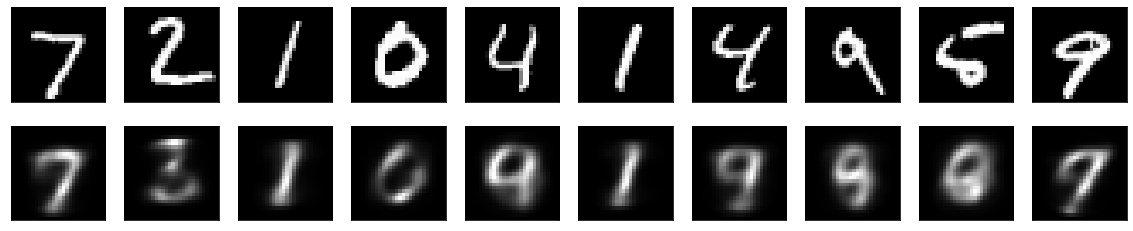

In [ ]:
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Adding a sparsity constraint on the encoded representations

In [ ]:
from keras import regularizers

encoding_dim = 32

input_img = keras.Input(shape=(784,))
# Add a Dense layer with a L1 activity regularizer
encoded = layers.Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 1s 5ms/step - loss: 0.4065 - val_loss: 0.1020
Epoch 2/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0460 - val_loss: 0.0211
Epoch 3/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0151 - val_loss: 0.0111
Epoch 4/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0094 - val_loss: 0.0082
Epoch 5/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0075 - val_loss: 0.0070
Epoch 6/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0067 - val_loss: 0.0065
Epoch 7/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0063 - val_loss: 0.0062
Epoch 8/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0061 - val_loss: 0.0060
Epoch 9/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0059 - val_loss: 0.0059
Epoch 10/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0058 - val_lo

In [ ]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

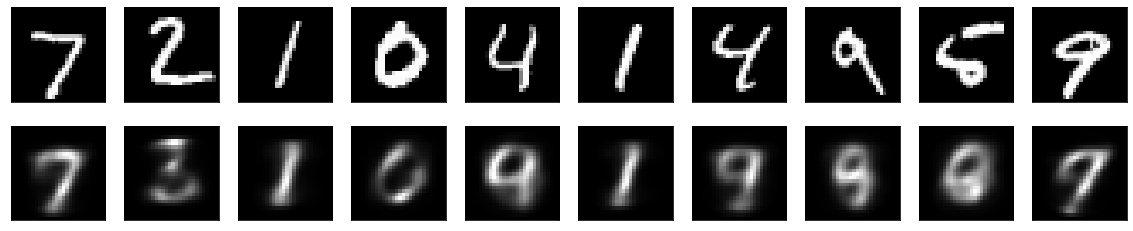

In [ ]:
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Deep autoencoder

In [ ]:
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

In [ ]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 2s 5ms/step - loss: 0.0893 - val_loss: 0.0041
Epoch 2/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0041 - val_loss: 0.0041
Epoch 3/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0041 - val_loss: 0.0041
Epoch 4/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0040 - val_loss: 0.0041
Epoch 5/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0040 - val_loss: 0.0041
Epoch 6/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0040 - val_loss: 0.0040
Epoch 7/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0040 - val_loss: 0.0040
Epoch 8/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0040 - val_loss: 0.0040
Epoch 9/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0040 - val_loss: 0.0040
Epoch 10/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0040 - val_lo

In [ ]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

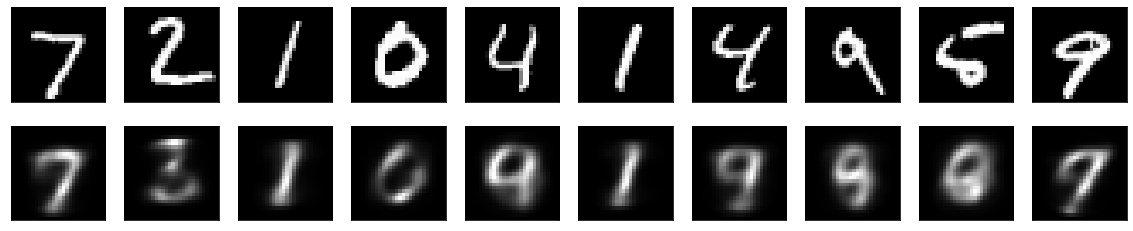

In [ ]:
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Convolutional autoencoder

In [ ]:
import keras
from keras import layers

input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [ ]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
469/469 [==============================] - 13s 6ms/step - loss: 0.2175 - val_loss: 0.1434
Epoch 2/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1348 - val_loss: 0.1266
Epoch 3/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1232 - val_loss: 0.1179
Epoch 4/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1162 - val_loss: 0.1120
Epoch 5/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1115 - val_loss: 0.1085
Epoch 6/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1084 - val_loss: 0.1058
Epoch 7/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1061 - val_loss: 0.1037
Epoch 8/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1043 - val_loss: 0.1024
Epoch 9/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1029 - val_loss: 0.1010
Epoch 10/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1018 - val_loss: 0.100

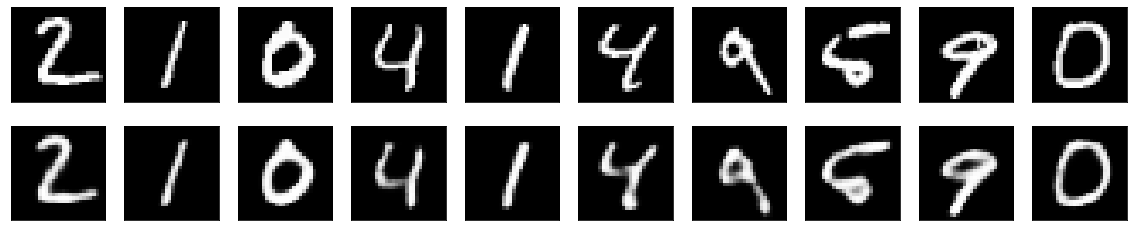

In [ ]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

128차원으로 인코딩된 표현도 살펴볼 수 있습니다. 이러한 표현은 8x4x4이므로 회색조 이미지로 표시할 수 있도록 4x32로 모양을 변경합니다.

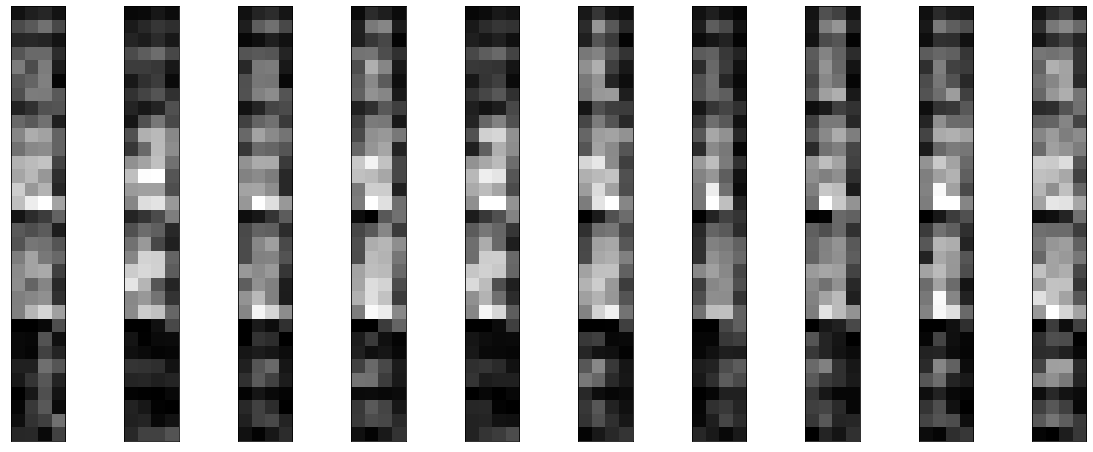

In [ ]:
encoder = keras.Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 8))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_imgs[i].reshape((4, 4 * 8)).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

이미지 노이즈 제거에 적용

In [ ]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

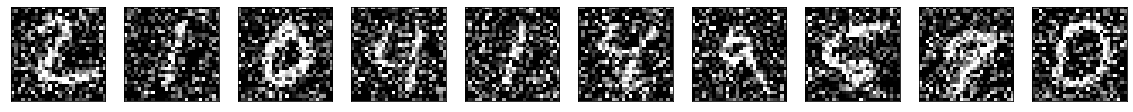

In [ ]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# At this point the representation is (7, 7, 32)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)])

Epoch 1/100
469/469 [==============================] - 5s 8ms/step - loss: 0.1577 - val_loss: 0.1147
Epoch 2/100
469/469 [==============================] - 3s 7ms/step - loss: 0.1121 - val_loss: 0.1074
Epoch 3/100
469/469 [==============================] - 3s 7ms/step - loss: 0.1071 - val_loss: 0.1041
Epoch 4/100
469/469 [==============================] - 3s 7ms/step - loss: 0.1043 - val_loss: 0.1020
Epoch 5/100
469/469 [==============================] - 3s 7ms/step - loss: 0.1025 - val_loss: 0.1010
Epoch 6/100
469/469 [==============================] - 3s 7ms/step - loss: 0.1013 - val_loss: 0.0998
Epoch 7/100
469/469 [==============================] - 3s 7ms/step - loss: 0.1004 - val_loss: 0.0993
Epoch 8/100
469/469 [==============================] - 5s 10ms/step - loss: 0.0995 - val_loss: 0.0987
Epoch 9/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0989 - val_loss: 0.0977
Epoch 10/100
469/469 [==============================] - 4s 7ms/step - loss: 0.0983 - val_l

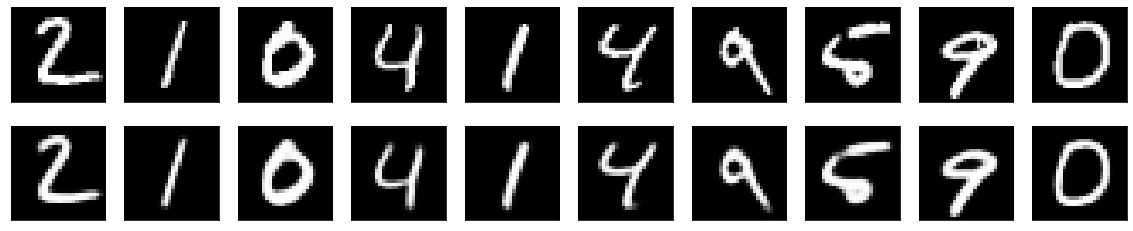

In [ ]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

변형 자동 인코더(VAE)

In [ ]:
original_dim = 28 * 28
intermediate_dim = 64
latent_dim = 2

inputs = keras.Input(shape=(original_dim,))
h = layers.Dense(intermediate_dim, activation='relu')(inputs)
z_mean = layers.Dense(latent_dim)(h)
z_log_sigma = layers.Dense(latent_dim)(h)

In [ ]:
from keras import backend as K

def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim),
                              mean=0., stddev=0.1)
    return z_mean + K.exp(z_log_sigma) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_sigma])

In [ ]:
# Create encoder
encoder = keras.Model(inputs, [z_mean, z_log_sigma, z], name='encoder')

# Create decoder
latent_inputs = keras.Input(shape=(latent_dim,), name='z_sampling')
x = layers.Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = layers.Dense(original_dim, activation='sigmoid')(x)
decoder = keras.Model(latent_inputs, outputs, name='decoder')

# instantiate VAE model
outputs = decoder(encoder(inputs)[2])
vae = keras.Model(inputs, outputs, name='vae_mlp')

In [ ]:
reconstruction_loss = keras.losses.binary_crossentropy(inputs, outputs)
reconstruction_loss *= original_dim
kl_loss = 1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

vae.fit(x_train, x_train,
        epochs=100,
        batch_size=32,
        validation_data=(x_test, x_test))

Epoch 1/100
1875/1875 [==============================] - 6s 3ms/step - loss: 186.5208 - val_loss: 168.5251
Epoch 2/100
1875/1875 [==============================] - 5s 3ms/step - loss: 166.0858 - val_loss: 163.8862
Epoch 3/100
1875/1875 [==============================] - 5s 3ms/step - loss: 162.8425 - val_loss: 161.9471
Epoch 4/100
1875/1875 [==============================] - 5s 3ms/step - loss: 160.9634 - val_loss: 160.2191
Epoch 5/100
1875/1875 [==============================] - 5s 3ms/step - loss: 159.0988 - val_loss: 158.3674
Epoch 6/100
1875/1875 [==============================] - 5s 3ms/step - loss: 157.4507 - val_loss: 156.9643
Epoch 7/100
1875/1875 [==============================] - 5s 3ms/step - loss: 156.2311 - val_loss: 155.8911
Epoch 8/100
1875/1875 [==============================] - 5s 3ms/step - loss: 155.3531 - val_loss: 155.3573
Epoch 9/100
1875/1875 [==============================] - 5s 3ms/step - loss: 154.6574 - val_loss: 154.5165
Epoch 10/100
1875/1875 [=============

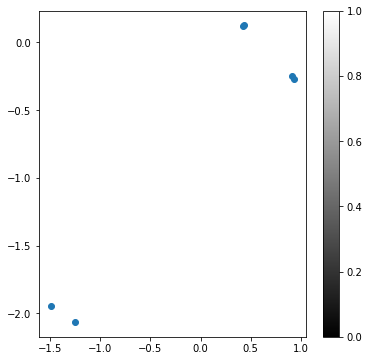

In [ ]:
x_test_encoded = encoder.predict(x_test, batch_size=32)
x_test_encoded = np.array(x_test_encoded)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1])
plt.colorbar()
plt.show()

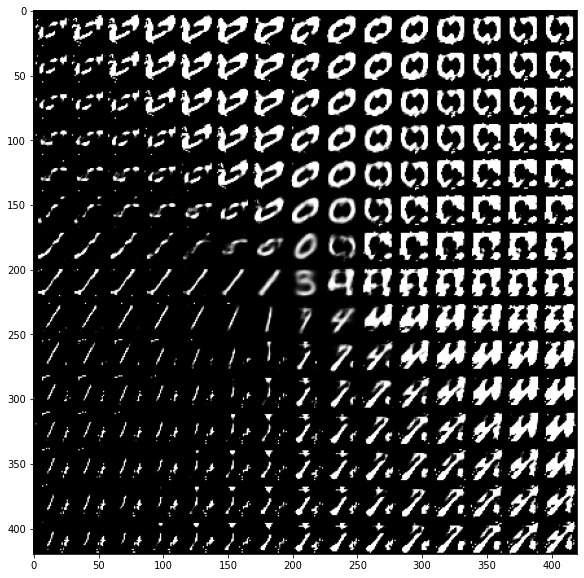

In [ ]:
# Display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# We will sample n points within [-15, 15] standard deviations
grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = decoder.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()